In [1]:
import pyucalgarysrs
import datetime

In [21]:
srs = pyucalgarysrs.PyUCalgarySRS()
start_dt = datetime.datetime(2025, 3, 19, 6, 0, 0)
end_dt = datetime.datetime(2025, 3, 19, 6, 4, 59)

In [22]:
res = srs.data.download("SMILE_ASI_RAW", start_dt, end_dt, site_uid="atha", overwrite=True)

In [23]:
data = srs.data.read(res.dataset, res.filenames, n_parallel=2)

In [24]:
data.data

array([[[[ 8,  8,  8, ..., 10, 10, 10],
         [ 5,  5,  5, ...,  6,  5,  6],
         [ 7,  7,  7, ...,  7,  7,  7]],

        [[12,  8, 10, ..., 10,  8, 12],
         [ 6,  5,  5, ...,  5,  5,  6],
         [ 7,  6,  6, ...,  7,  6,  7]],

        [[10,  8, 10, ...,  8, 10,  8],
         [ 6,  5,  6, ...,  5,  6,  5],
         [ 7,  7,  7, ...,  6,  6,  7]],

        ...,

        [[10,  8,  8, ...,  8,  8, 10],
         [ 5,  5,  5, ...,  5,  5,  6],
         [ 6,  7,  6, ...,  5,  6,  6]],

        [[ 8,  8, 10, ..., 10, 10, 10],
         [ 5,  5,  5, ...,  5,  5,  5],
         [ 6,  6,  6, ...,  6,  5,  7]],

        [[10, 10, 10, ..., 10,  6, 10],
         [ 5,  5,  5, ...,  5,  5,  5],
         [ 6,  5,  5, ...,  7,  5,  6]]],


       [[[ 8, 10, 10, ..., 10,  8,  8],
         [ 5,  6,  6, ...,  5,  6,  5],
         [ 7,  7,  7, ...,  6,  7,  6]],

        [[ 8,  8, 10, ..., 10, 10, 10],
         [ 5,  5,  6, ...,  5,  5,  5],
         [ 7,  7,  6, ...,  6,  7,  6]],

        

In [25]:
import numpy as np

scale_min = 15.0  # MUST be a float
scale_max = 90.0  # MUST be a float

scale_diff = scale_max - scale_min
scale_ratio = 255.0 / scale_diff
im_scaled = (data.data[:, :, :, :] - scale_min) * scale_ratio  # apply scale
im_scaled = im_scaled.clip(0, 255) + 0.5  # limit to 0-65535 (the range of a 16-bit image)
im_scaled = im_scaled.astype(np.uint8)  # convert data type to 16-bit

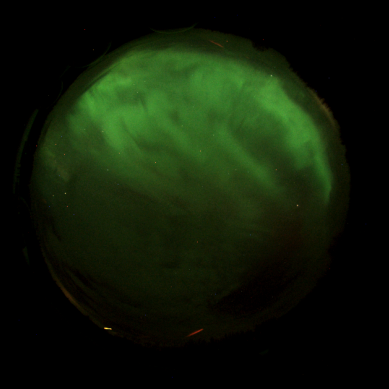

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(im_scaled[:, :, :, 0], origin="lower")
plt.axis("off")
plt.show()

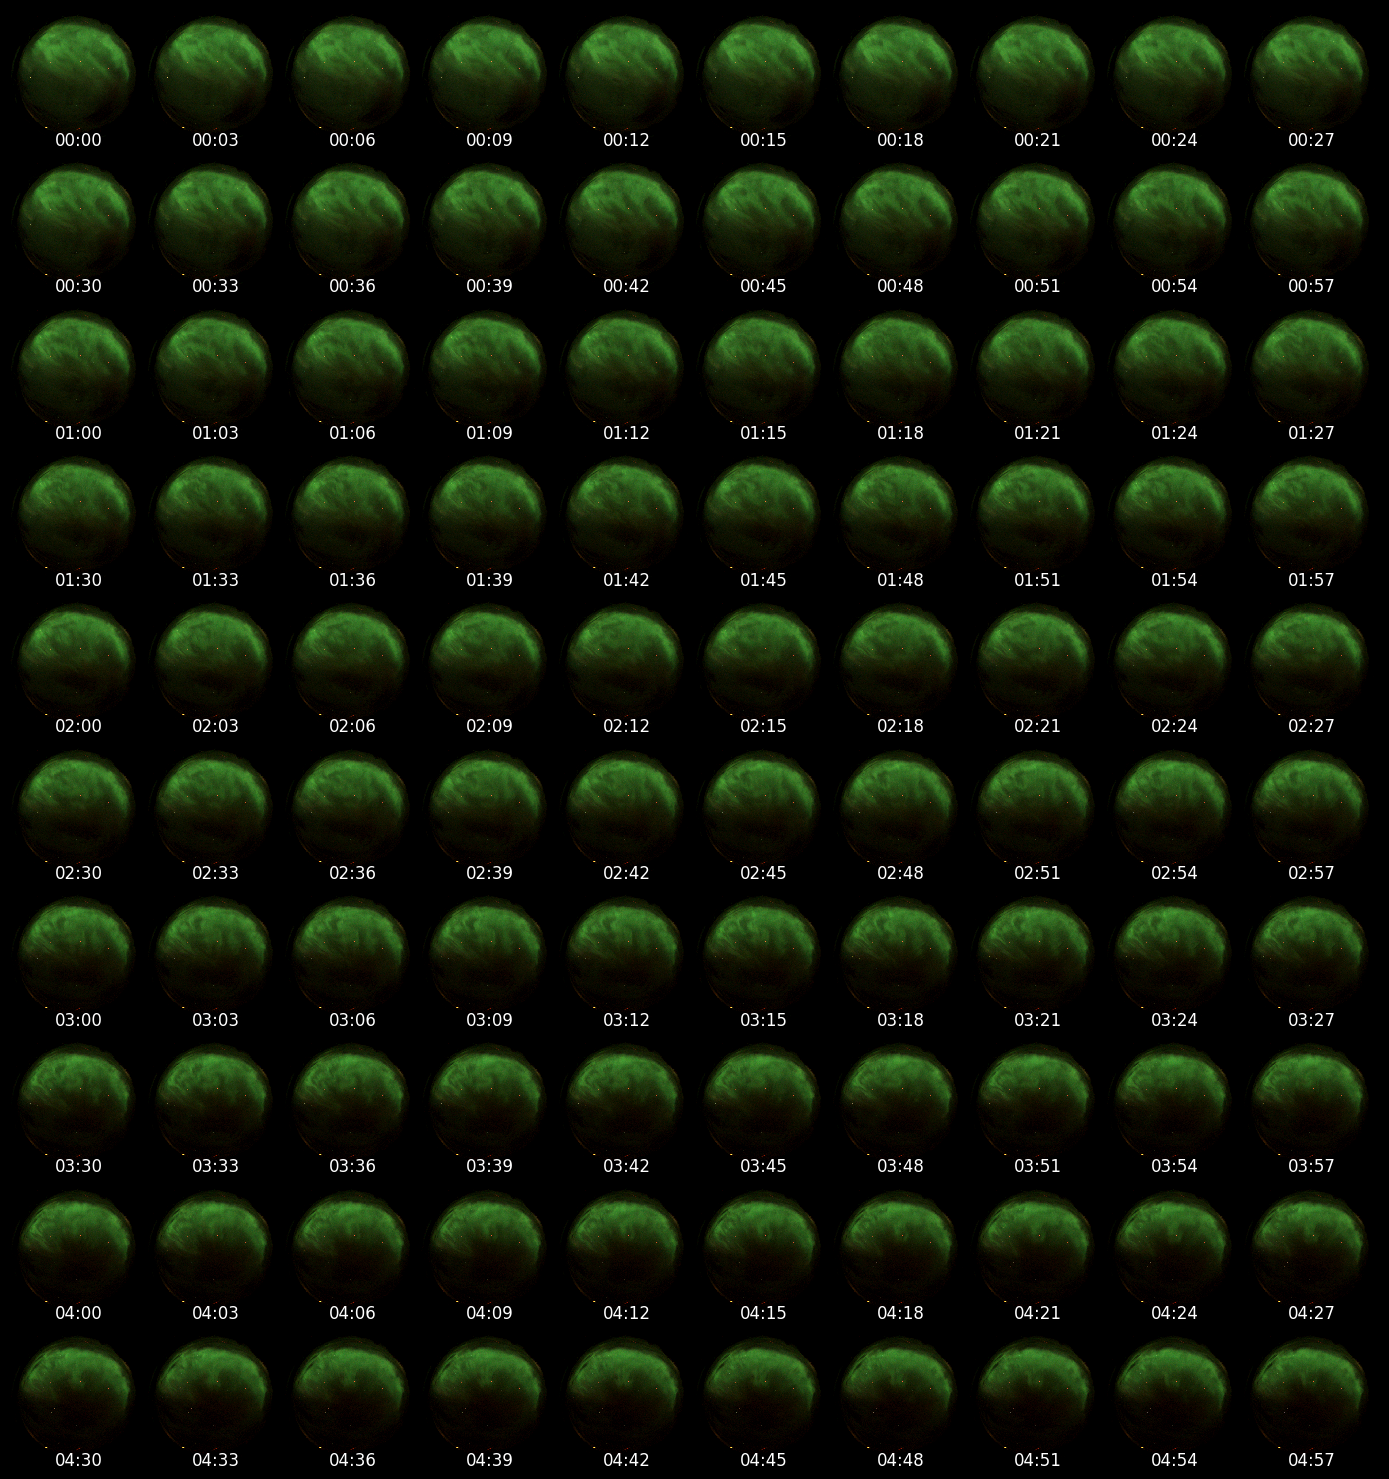

In [ ]:
plt.style.use("dark_background")

rows = 10
cols = 10
figsize = (14, 15)
timestamps_format = "%M:%S"
timestamps_fontsize = 12
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
for ax, i in zip(axs.flat, range(0, len(data.timestamp))):
    ax.imshow(im_scaled[:, :, :, i], cmap="grey", origin="lower", interpolation="nearest")
    ax.set_axis_off()

    # show timestamp
    ax.text(
        int(np.floor(im_scaled.shape[1] / 2.)),
        5,
        data.timestamp[i].strftime(timestamps_format),
        ha="center",
        fontsize=timestamps_fontsize,
    )
plt.tight_layout(h_pad=0, w_pad=0)